## Multiple Linear Regression

### Shared Bikes Demand Prediction - Assignment Solution

#### Problem Statement:
A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

The company wants to know —

a.Which variables are significant in predicting the demand for shared bikes.

b.How well those variables describe the bike demands


### The solution is divided into the following sections:

1.Data understanding and exploration

2.Data Visualisation

3.Data preparation

4.Model building and evaluation

### 1. Data Understanding & Exploration

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("day (1).csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### assigning string values to different seasons instead of numeric values

In [7]:
# Convert 'season', 'weathersit', 'mnth', and 'weekday' to meaningful categories
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

##### checking & getting data count

In [8]:
df['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

##### year(0:2018,1:2019)

In [9]:
df['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

#### assigning string values to different months

In [10]:
def object_map(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [11]:
df['mnth']=df[['mnth']].apply(object_map)

In [12]:
df['mnth'].astype('category').value_counts()

mnth
Aug    62
Dec    62
Jan    62
Jul    62
Mar    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: count, dtype: int64

##### whether day is a holiday or not (0: no, 1:yes)

In [13]:
df['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

#### assigning string values to weekdays instead of numeric values

In [14]:
def str_map(x):
    return x.map({1:'wed',2:'thurs',3:'fri',4:'sat',5:'sun',6:'mon',0:'tues'})

In [15]:
df['weekday']=df[['weekday']].apply(str_map)

In [16]:
df['weekday'].astype('category').value_counts()

weekday
thurs    105
wed      105
fri      104
mon      104
sat      104
sun      104
tues     104
Name: count, dtype: int64

##### workingday- if day is neither weekend nor a holiday is 1, otherwise 0

In [17]:
df['workingday'].astype('category').value_counts()

workingday
1    504
0    226
Name: count, dtype: int64

#### replacing long weathersit names into string values

In [18]:
df['weathersit']=df['weathersit'].map({1:'A',2:'B',3:'C',4:'D'})

#### extracting the type of weather situations present in the data

In [19]:
df['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

In [20]:
df['weathersit'].astype('category').value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

### 2. Data Visualization

In [21]:
num_cols=["temp","atemp","hum","windspeed","cnt"]

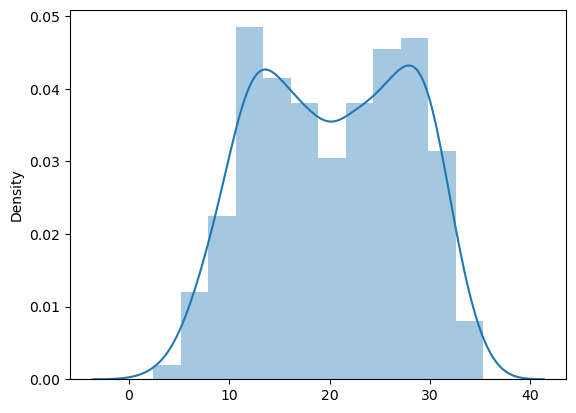

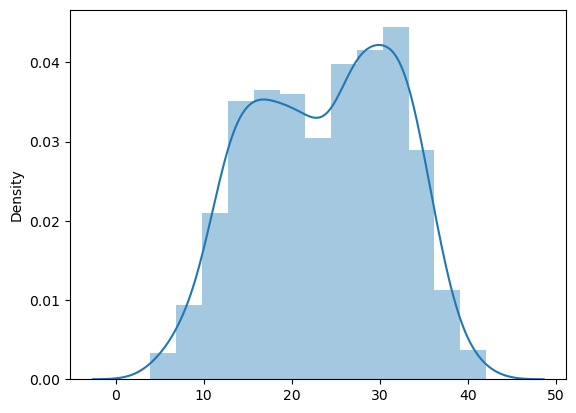

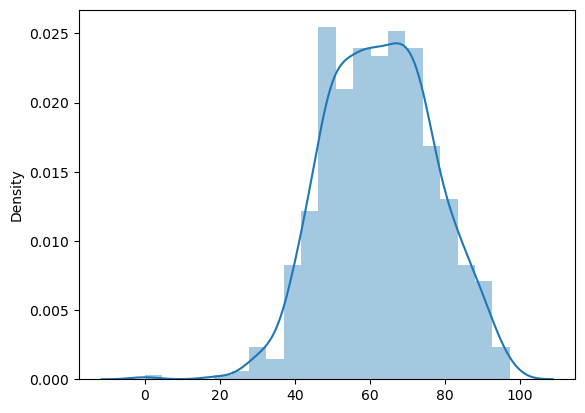

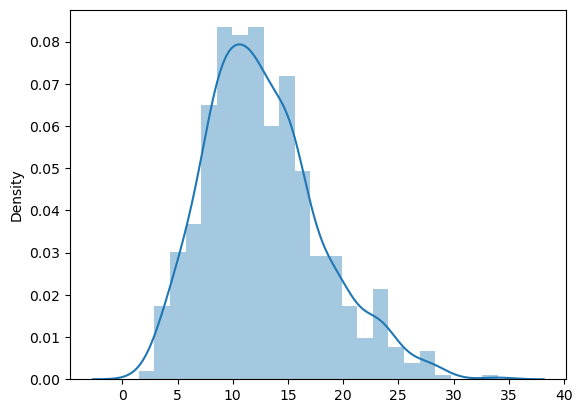

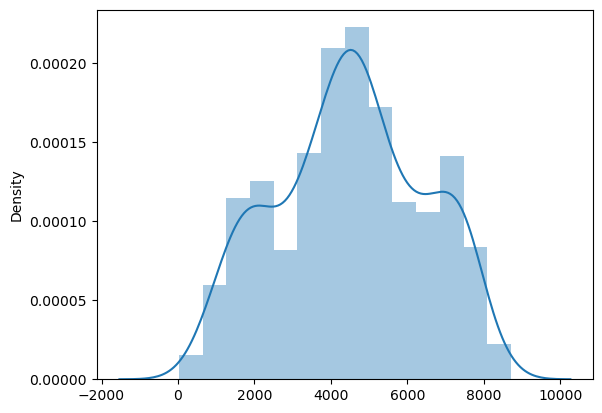

In [22]:
for i in num_cols:
    sns.distplot(x=df[i])
    plt.show()

#### converting date to datetime format

In [23]:
df['dteday']=pd.to_datetime(df['dteday'],dayfirst=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [25]:
cat_cols=df.select_dtypes(exclude=['float64','datetime64','int64'])
print(cat_cols.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


#### bivariate analysis of categorical columns

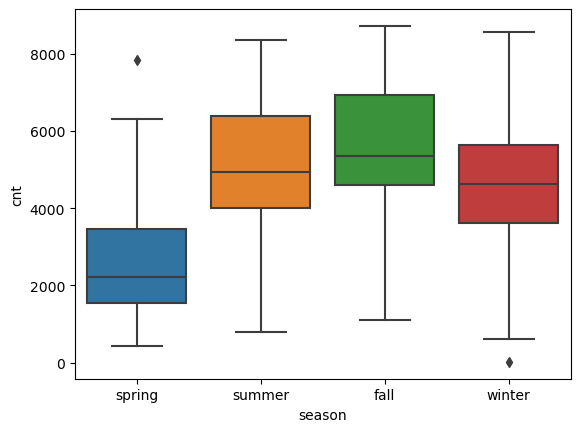

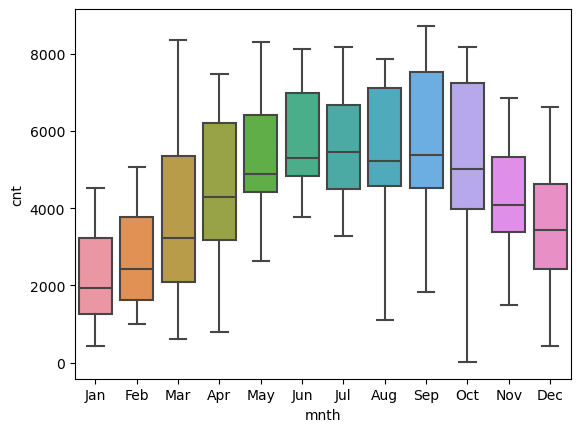

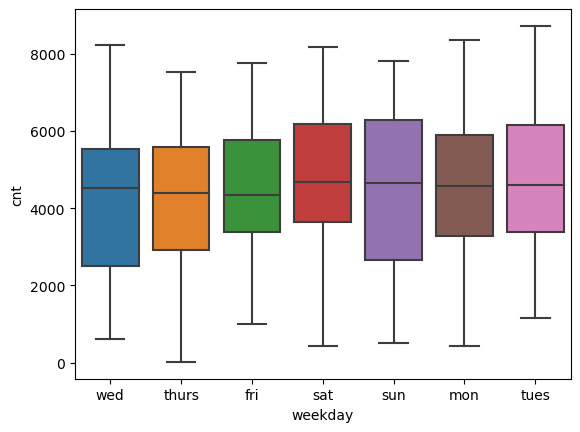

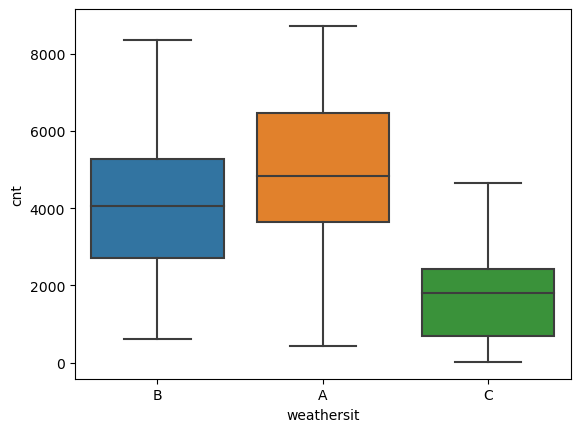

In [26]:
for i in cat_cols:
    sns.boxplot(x=df[i],y=df['cnt'])
    plt.show()

#### converting "casual","registered","cnt" to float

In [27]:
Intvariablelist=["casual","registered","cnt"]
for Var in Intvariablelist:
    df[Var]=df[Var].astype("float")

In [28]:
df_numeric_cols=df.select_dtypes(include=['float64'])
df_numeric_cols

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,247.0,1867.0,2114.0
726,10.386653,12.75230,59.0000,10.416557,644.0,2451.0,3095.0
727,10.386653,12.12000,75.2917,8.333661,159.0,1182.0,1341.0
728,10.489153,11.58500,48.3333,23.500518,364.0,1432.0,1796.0


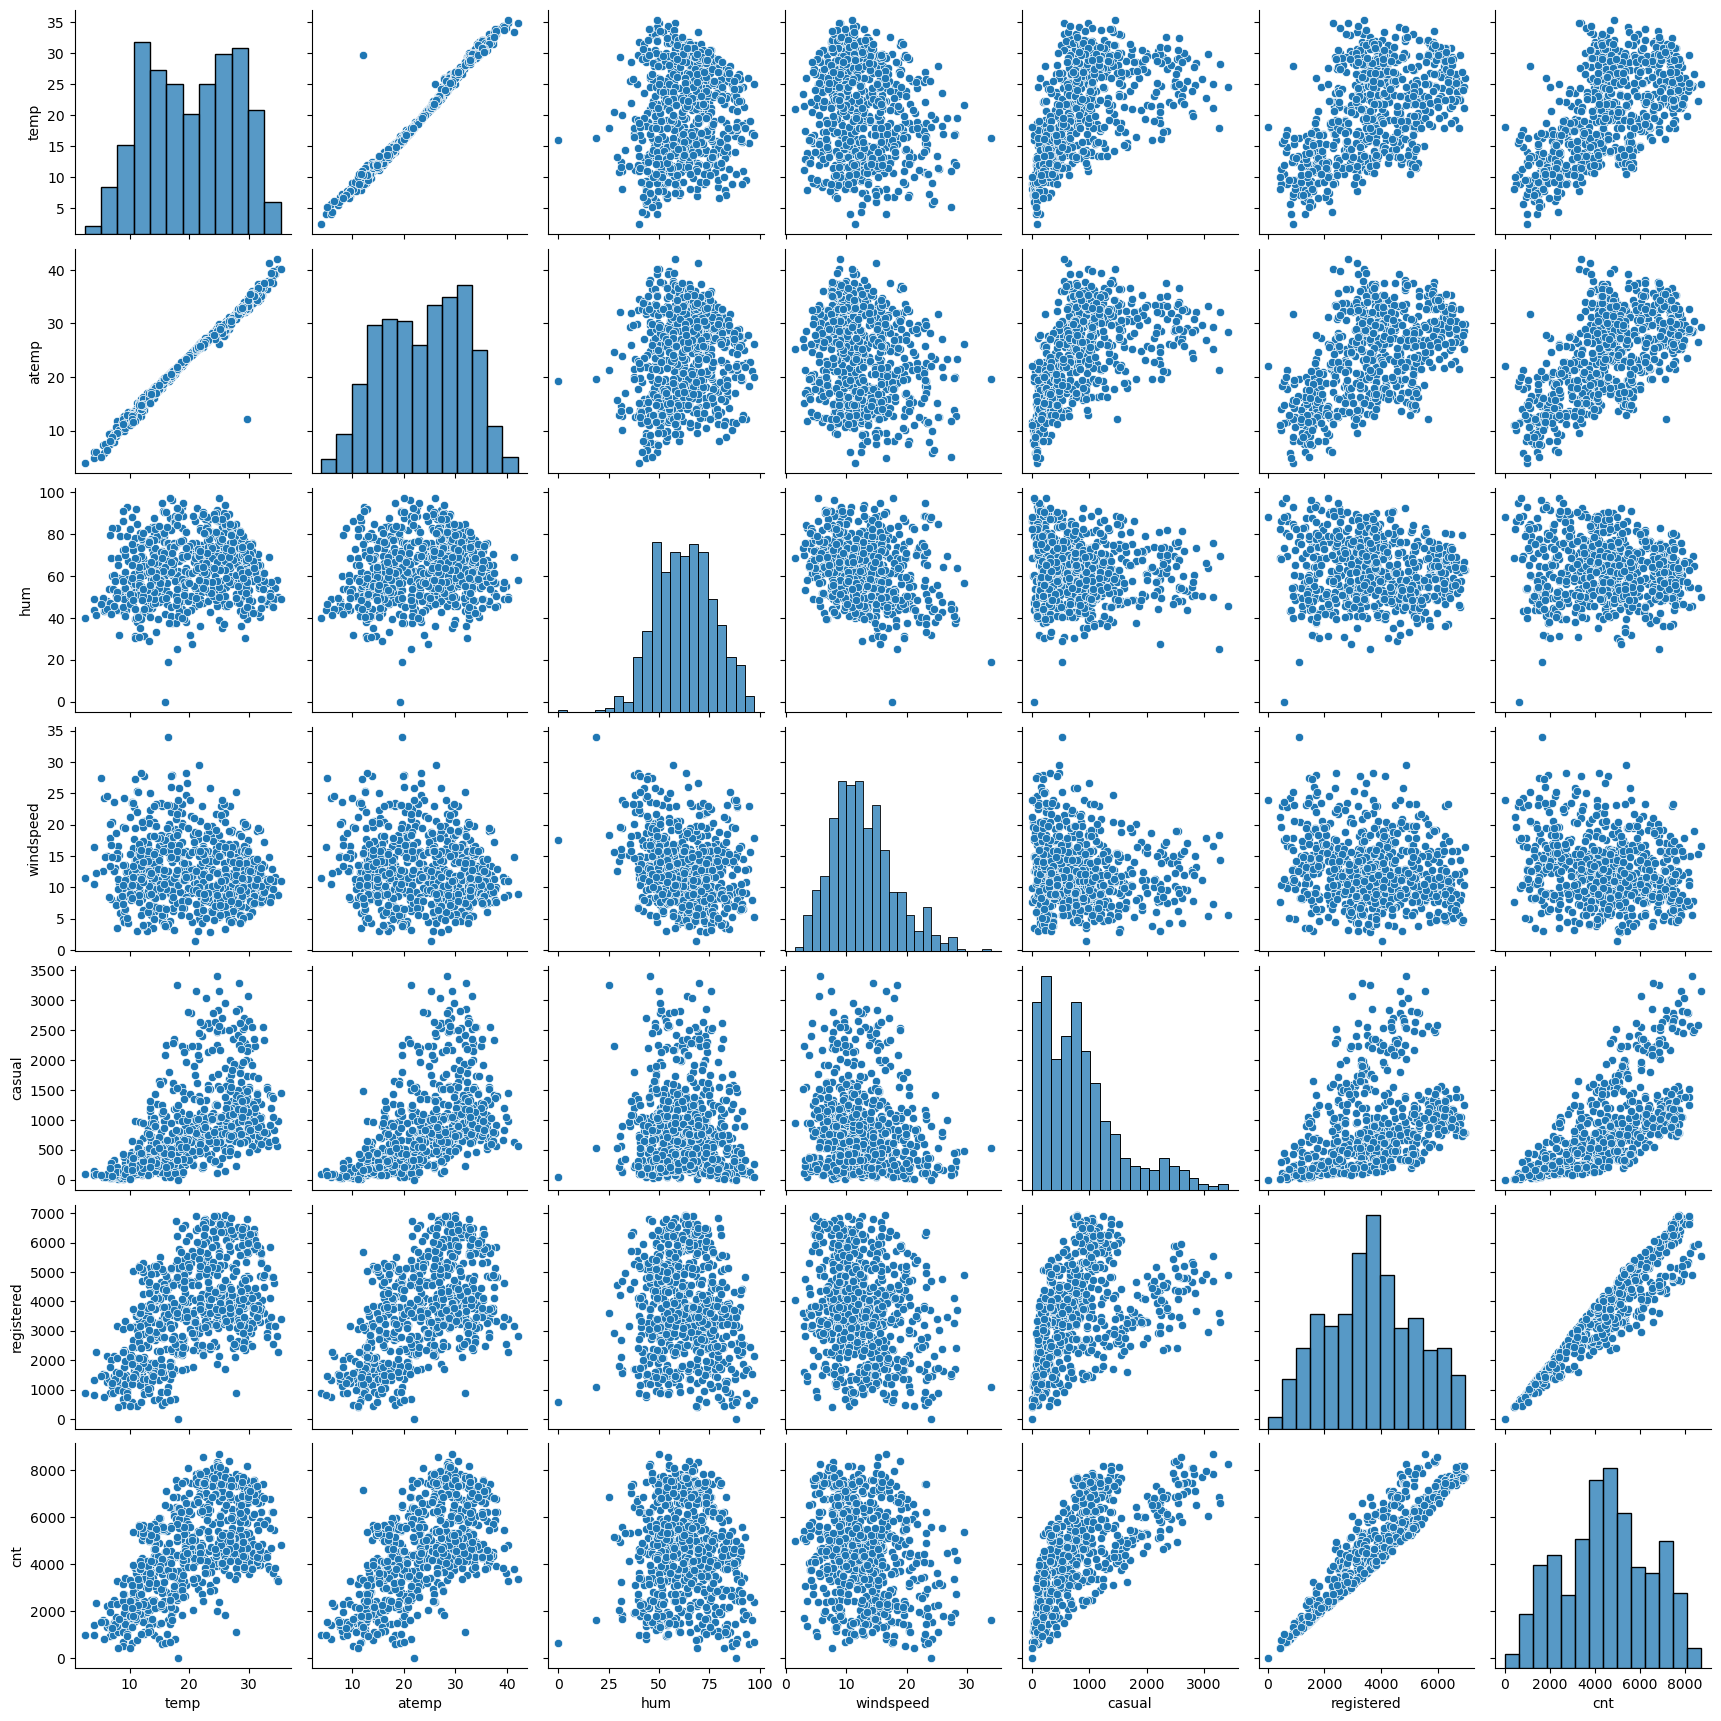

In [29]:
sns.pairplot(df_numeric_cols)
plt.show()

#### heatmap

<Axes: >

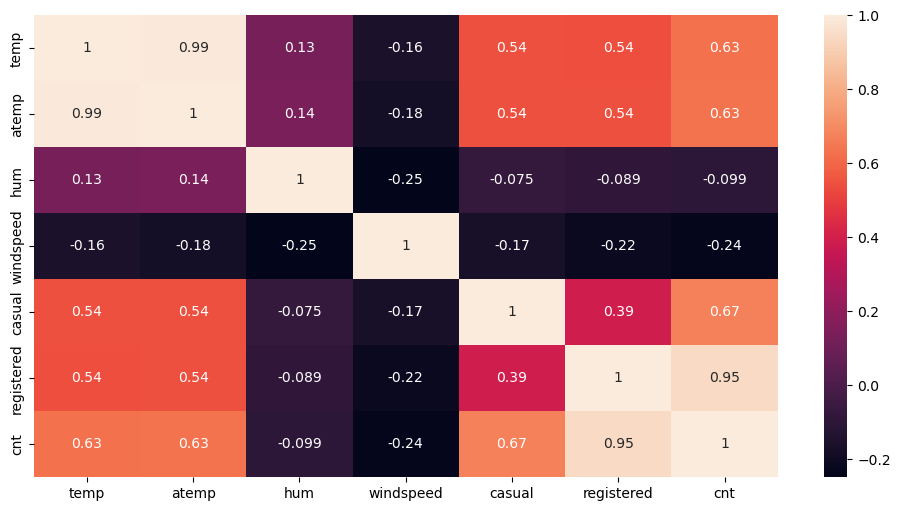

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(df_numeric_cols.corr(),annot=True)

#### The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:

Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'atemp'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:

Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.

##### removing atemp as it is highly correlated with temp

In [31]:
df.drop('atemp',axis=1,inplace=True)

### 3. Data Preparation

#### subset all categorical variables

In [32]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,wed,B
1,spring,Jan,thurs,B
2,spring,Jan,fri,A
3,spring,Jan,sat,A
4,spring,Jan,sun,A
...,...,...,...,...
725,spring,Dec,sun,B
726,spring,Dec,mon,B
727,spring,Dec,tues,B
728,spring,Dec,wed,A


#### dummy variables

In [33]:
df_dummies=pd.get_dummies(df_categorical,drop_first=True).astype(bool).astype(int)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
df_dummies.dtypes

season_spring    int32
season_summer    int32
season_winter    int32
mnth_Aug         int32
mnth_Dec         int32
mnth_Feb         int32
mnth_Jan         int32
mnth_Jul         int32
mnth_Jun         int32
mnth_Mar         int32
mnth_May         int32
mnth_Nov         int32
mnth_Oct         int32
mnth_Sep         int32
weekday_mon      int32
weekday_sat      int32
weekday_sun      int32
weekday_thurs    int32
weekday_tues     int32
weekday_wed      int32
weathersit_B     int32
weathersit_C     int32
dtype: object

#### concat dummy variables with main dataframe

In [35]:
df=pd.concat([df,df_dummies],axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_B,weathersit_C
0,1,2018-01-01,spring,0,Jan,0,wed,1,B,14.110847,...,0,0,0,0,0,0,0,1,1,0
1,2,2018-01-02,spring,0,Jan,0,thurs,1,B,14.902598,...,0,0,0,0,0,1,0,0,1,0
2,3,2018-01-03,spring,0,Jan,0,fri,1,A,8.050924,...,0,0,0,0,0,0,0,0,0,0
3,4,2018-01-04,spring,0,Jan,0,sat,1,A,8.200000,...,0,0,0,1,0,0,0,0,0,0
4,5,2018-01-05,spring,0,Jan,0,sun,1,A,9.305237,...,0,0,0,0,1,0,0,0,0,0


#### drop categorical variable columns

In [47]:
df=df.drop(list(df_categorical.columns),axis=1)

In [48]:
df.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thurs', 'weekday_tues', 'weekday_wed', 'weathersit_B',
       'weathersit_C'],
      dtype='object')

In [49]:
df.dtypes

instant                   int64
dteday           datetime64[ns]
yr                        int64
holiday                   int64
workingday                int64
temp                    float64
hum                     float64
windspeed               float64
casual                  float64
registered              float64
cnt                     float64
season_spring             int32
season_summer             int32
season_winter             int32
mnth_Aug                  int32
mnth_Dec                  int32
mnth_Feb                  int32
mnth_Jan                  int32
mnth_Jul                  int32
mnth_Jun                  int32
mnth_Mar                  int32
mnth_May                  int32
mnth_Nov                  int32
mnth_Oct                  int32
mnth_Sep                  int32
weekday_mon               int32
weekday_sat               int32
weekday_sun               int32
weekday_thurs             int32
weekday_tues              int32
weekday_wed               int32
weathers

In [50]:
df=df.drop(['instant','dteday'],axis=1)

### 4. Model Building & Evaluation

#### split the dataframe into train & test sets

In [51]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_B,weathersit_C
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,72.9583,14.707907,177.0,1506.0,1683.0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,0,1,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,1,0,0,0,0,0
350,0,0,1,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,0,0,0,0,0,1,1,0
79,0,0,1,17.647835,73.7391,19.348461,401.0,1676.0,2077.0,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
df_train.shape

(510, 31)

In [53]:
df_test.shape

(220, 31)

#### scaling

In [54]:
scaler=MinMaxScaler()
numeric_vars=['temp','hum','windspeed','casual','registered','cnt']
df_train[numeric_vars]=scaler.fit_transform(df_train[numeric_vars])
df_test[numeric_vars]=scaler.transform(df_test[numeric_vars])

In [55]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_B,weathersit_C
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0.053337,0.214554,0.191095,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,0,...,0,0,0,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,1,...,0,0,0,0,1,0,0,0,0,0
350,0,0,1,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,0,...,0,0,0,0,0,0,0,1,1,0
79,0,0,1,0.462664,0.759870,0.529881,0.121609,0.239099,0.236424,0,...,0,0,0,0,0,0,0,0,1,0


##### lets check the correlation coefficients to see which variables are highly correlated

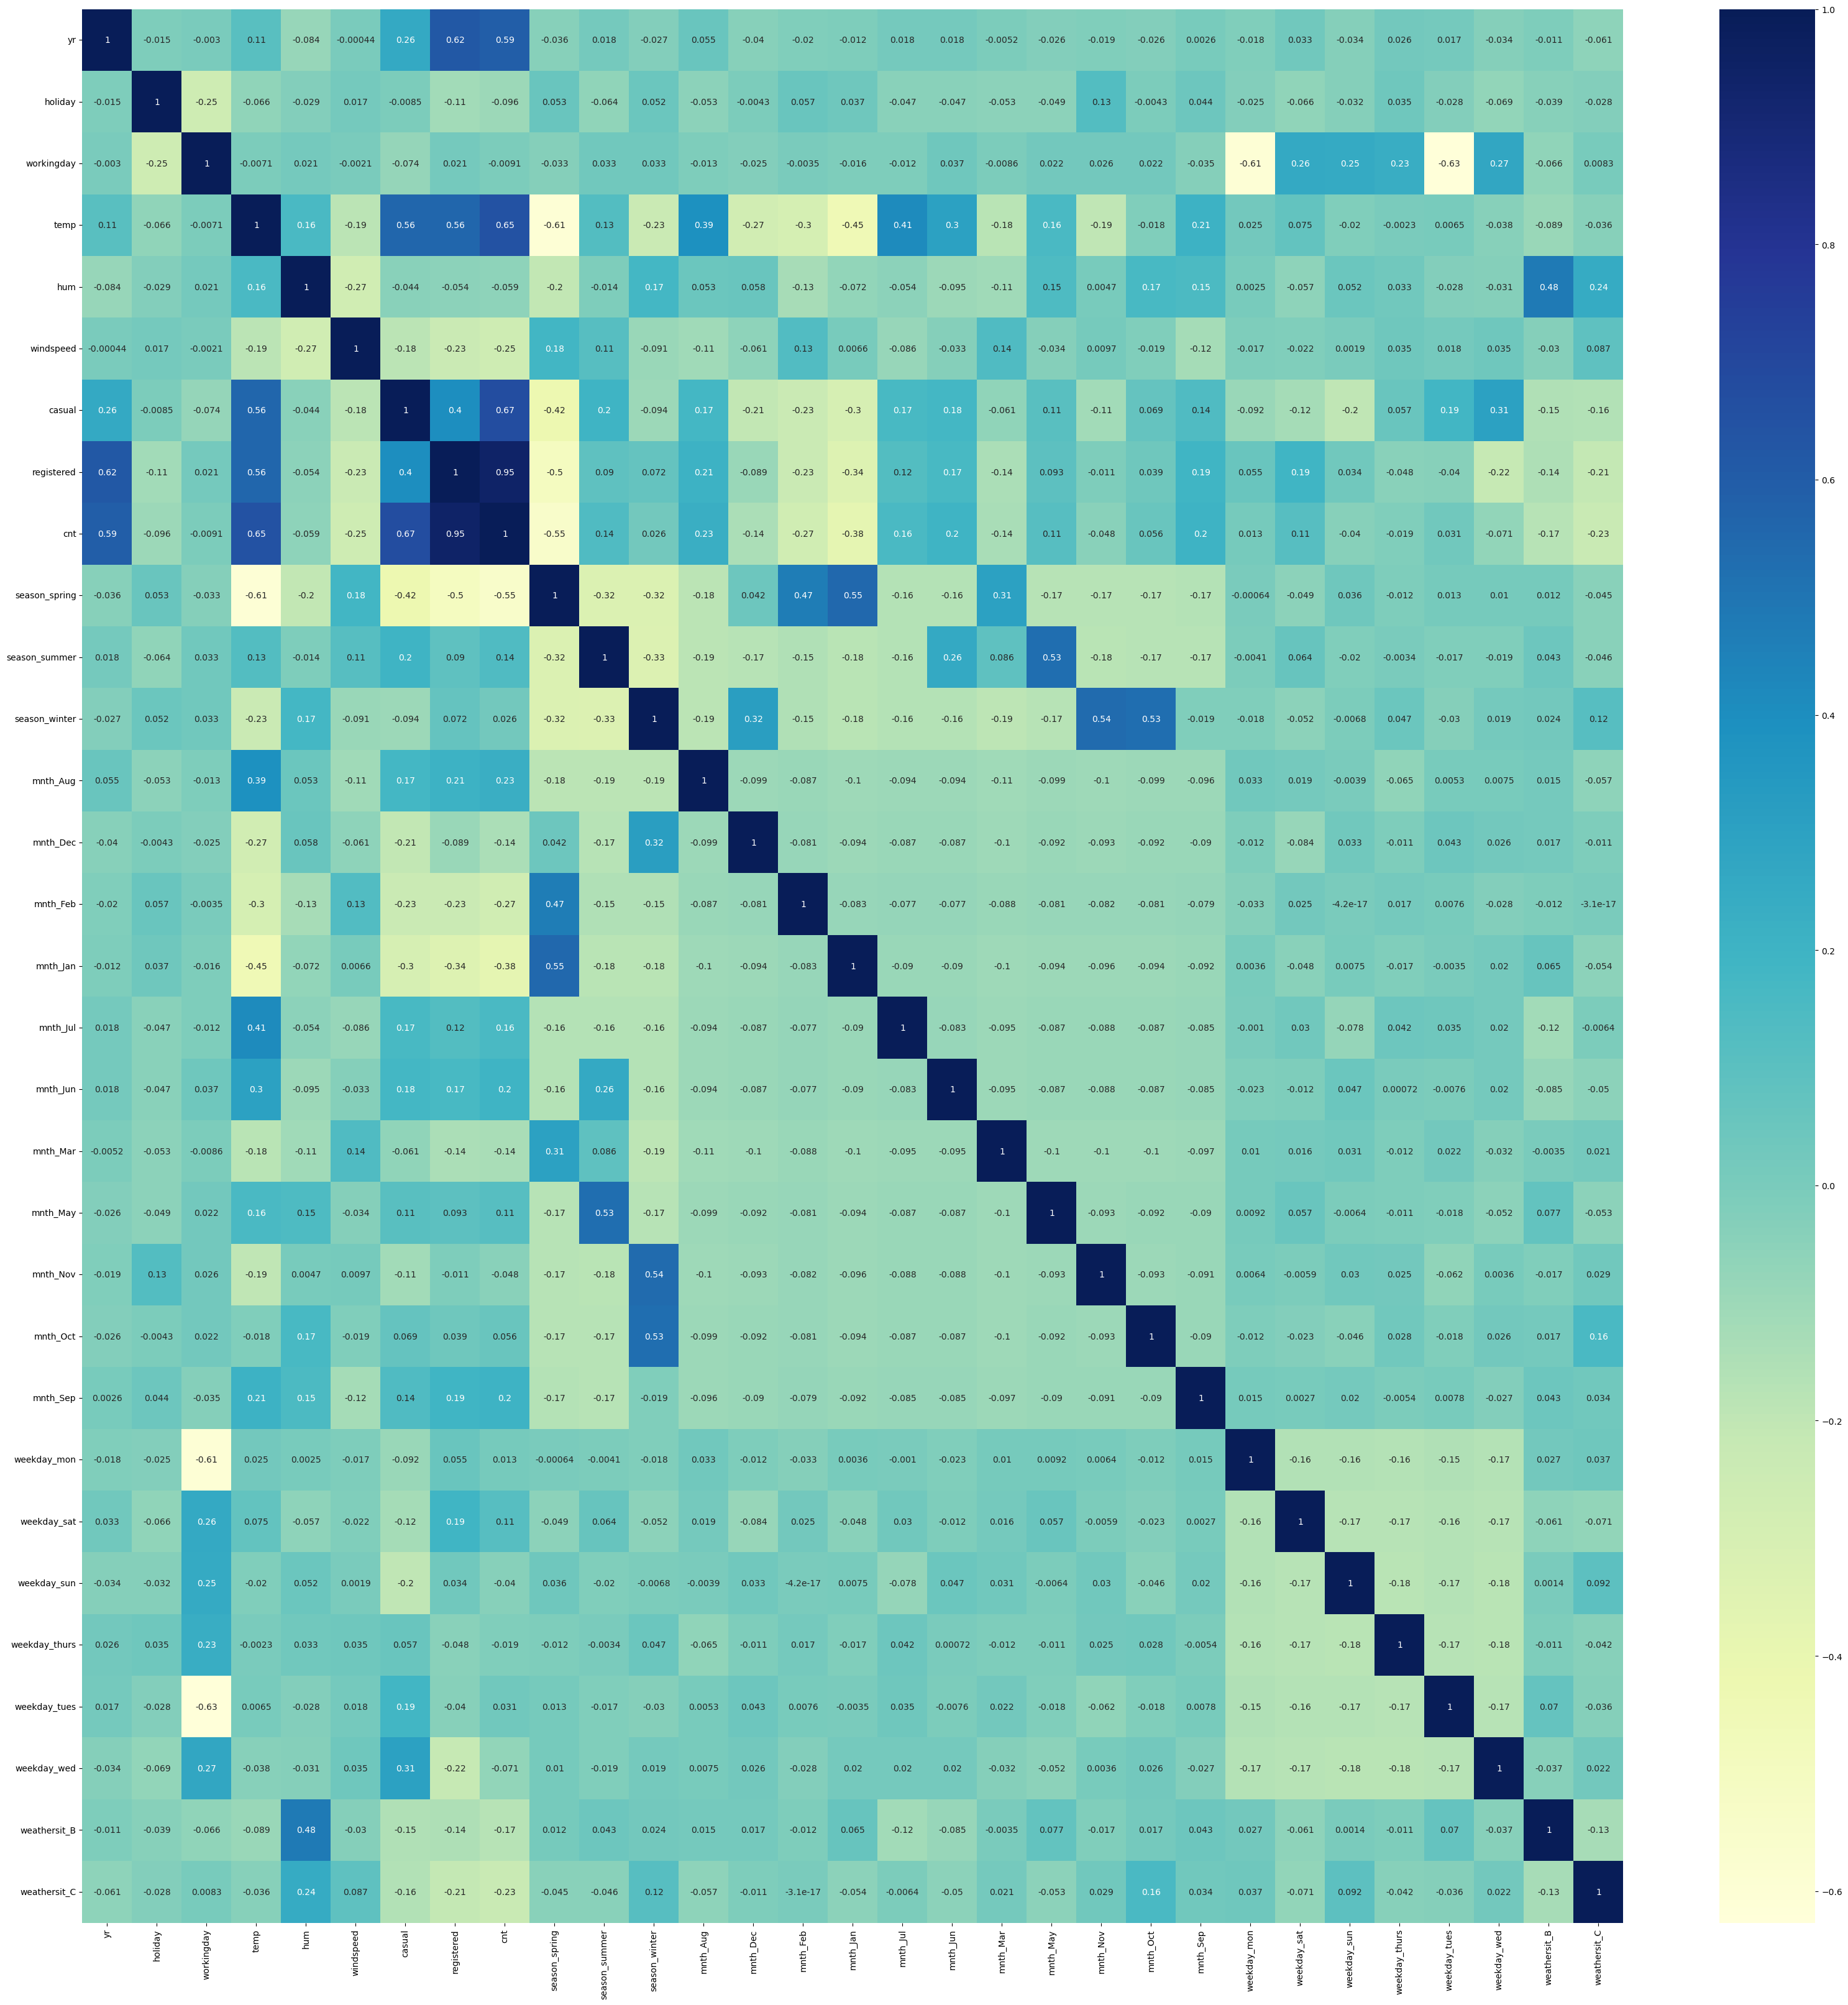

In [56]:
plt.figure(figsize=(40,40))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [58]:
df_train=df_train.drop(['casual','registered'],axis=1)

In [59]:
y_train=df_train.pop('cnt')
x_train=df_train

In [60]:
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [61]:
lm=LinearRegression()
x_train_lm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Fri, 18 Apr 2025   Prob (F-statistic):          1.34e-178
Time:                        09:57:37   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3809      0.084      4.523

In [62]:
lm.fit(x_train,y_train)

LinearRegression()

#### Model building using RFE of 15 variables

In [63]:
rfe1=RFE(estimator=lm,n_features_to_select=15)
rfe1.fit(x_train,y_train)
list(zip(x_train.columns,rfe1.support_,rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_mon', False, 4),
 ('weekday_sat', False, 10),
 ('weekday_sun', False, 11),
 ('weekday_thurs', False, 6),
 ('weekday_tues', False, 5),
 ('weekday_wed', False, 7),
 ('weathersit_B', True, 1),
 ('weathersit_C', True, 1)]

In [92]:
col1=x_train.columns[rfe1.support_]
x_train_rfe1=x_train[col1]
x_train_rfe1=sm.add_constant(x_train_rfe1)
x_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_B,weathersit_C
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1,0


#### fitting the model with 15 variables

In [93]:
lm1=sm.OLS(y_train,x_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Fri, 18 Apr 2025   Prob (F-statistic):          8.15e-189
Time:                        13:44:26   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

#### check for the VIF values of the feature variable

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
a=x_train_rfe1.drop('const',axis=1)

#### dataframe that contain the names of all feature variables & their respective VIF

In [95]:
vif=pd.DataFrame()
vif['Features']=a.columns
vif['VIF']=[variance_inflation_factor(a.values,i)
           for i in range(a.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.82
13,weathersit_B,2.32
0,yr,2.09
11,mnth_Nov,1.85
9,mnth_Jan,1.75


In [96]:
rfe2=RFE(estimator=lm,n_features_to_select=7)
rfe2.fit(x_train,y_train)
list(zip(x_train.columns,rfe2.support_,rfe2.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 11),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 5),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 17),
 ('mnth_Dec', False, 9),
 ('mnth_Feb', False, 10),
 ('mnth_Jan', False, 7),
 ('mnth_Jul', False, 4),
 ('mnth_Jun', False, 20),
 ('mnth_Mar', False, 22),
 ('mnth_May', False, 16),
 ('mnth_Nov', False, 8),
 ('mnth_Oct', False, 21),
 ('mnth_Sep', False, 2),
 ('weekday_mon', False, 12),
 ('weekday_sat', False, 18),
 ('weekday_sun', False, 19),
 ('weekday_thurs', False, 14),
 ('weekday_tues', False, 13),
 ('weekday_wed', False, 15),
 ('weathersit_B', False, 6),
 ('weathersit_C', True, 1)]

In [97]:
col1=x_train.columns[rfe2.support_]
x_train_rfe2=x_train[col1]
x_train_rfe2=sm.add_constant(x_train_rfe2)
x_train_rfe2.head()

,const,yr,holiday,temp,hum,windspeed,season_winter,weathersit_C
576,1.0,1,0,0.815169,0.725633,0.264686,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,0


#### lets check the VIF for selected features

In [98]:
b=x_train_rfe2.drop('const',axis=1)

#### dataframe with names of all features with respective VIFs

In [99]:
vif=pd.DataFrame()
vif['Features']=b.columns
vif['VIF']=[variance_inflation_factor(b.values,i)
            for i in range(b.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,9.80
2,temp,6.87
4,windspeed,3.42
0,yr,2.01
5,season_winter,1.48
6,weathersit_C,1.08
1,holiday,1.03


#### dropping 'hum' column as it has VIF>5

In [100]:
x_train_rfe2.drop("hum",axis=1,inplace=True)
x_train_rfe2

,const,yr,holiday,temp,windspeed,season_winter,weathersit_C
576,1.0,1,0,0.815169,0.264686,0,0
426,1.0,1,0,0.442393,0.255342,0,0
728,1.0,1,0,0.245101,0.663106,0,0
482,1.0,1,0,0.395666,0.188475,0,0
111,1.0,0,0,0.345824,0.380981,0,0
...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0
53,1.0,0,0,0.202618,0.111379,0,0
350,1.0,0,0,0.248216,0.431816,1,0
79,1.0,0,0,0.462664,0.529881,0,0


In [101]:
x_train__rfe2=sm.add_constant(x_train_rfe2)

#### fit the model with 6 variables

In [102]:
lm3=sm.OLS(y_train,x_train_rfe2).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     292.4
Date:                Fri, 18 Apr 2025   Prob (F-statistic):          1.93e-160
Time:                        13:44:43   Log-Likelihood:                 421.78
No. Observations:                 510   AIC:                            -829.6
Df Residuals:                     503   BIC:                            -799.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1008      0.018      5.481

#### check VIF values

In [103]:
c=x_train_rfe2.drop('const',axis=1)

#### dataframe with names of all features variable & their respective VIFs

In [105]:
vif=pd.DataFrame()
vif['Features']=c.columns
vif['VIF']=[variance_inflation_factor(c.values,i)
           for i in range(c.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,3.07
3,windspeed,2.81
0,yr,2.00
4,season_winter,1.24
5,weathersit_C,1.06
1,holiday,1.03


#### VIF & p-value are in permissible range. Adjusted R-Squared to 77% using 6 variables.

### Residual Analysis

In [107]:
y_train_cnt=lm3.predict(x_train_rfe2)

#### plot the histogram of error terms

Text(0.5, 0, 'Error')

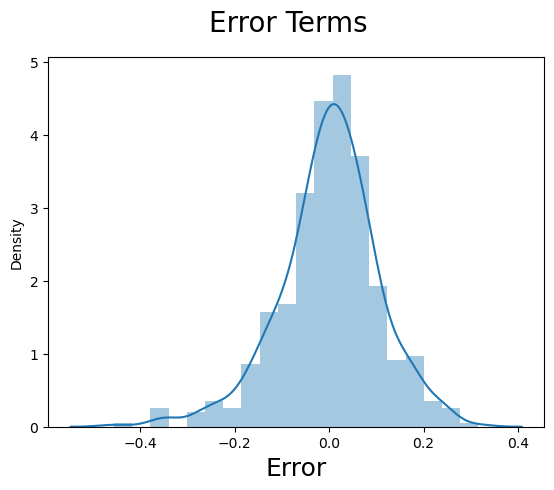

In [108]:
fig=plt.figure()
sns.distplot((y_train-y_train_cnt),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Error',fontsize=18)

#### making predictions

In [109]:
x_train_rfe2

,const,yr,holiday,temp,windspeed,season_winter,weathersit_C
576,1.0,1,0,0.815169,0.264686,0,0
426,1.0,1,0,0.442393,0.255342,0,0
728,1.0,1,0,0.245101,0.663106,0,0
482,1.0,1,0,0.395666,0.188475,0,0
111,1.0,0,0,0.345824,0.380981,0,0
...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0
53,1.0,0,0,0.202618,0.111379,0,0
350,1.0,0,0,0.248216,0.431816,1,0
79,1.0,0,0,0.462664,0.529881,0,0


In [110]:
numeric_vars

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [111]:
df_test[numeric_vars]

,temp,hum,windspeed,casual,registered,cnt
184,0.831783,0.657364,0.084219,0.933557,0.427086,0.692706
535,0.901354,0.610133,0.153728,0.265163,0.767976,0.712034
299,0.511964,0.837699,0.334206,0.072539,0.346376,0.303382
221,0.881625,0.437098,0.339570,0.268820,0.559630,0.547400
152,0.817246,0.314298,0.537414,0.223712,0.608143,0.569029
...,...,...,...,...,...,...
702,0.519232,0.756118,0.283397,0.167327,0.871354,0.757478
127,0.584649,0.650923,0.069510,0.426394,0.420445,0.495973
640,0.745598,0.817947,0.052115,0.221274,0.985273,0.868615
72,0.331557,0.512107,0.203418,0.108808,0.240687,0.232858


In [113]:
df_test

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.933557,0.427086,0.692706,0,...,0,0,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.265163,0.767976,0.712034,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.072539,0.346376,0.303382,0,...,1,0,1,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.268820,0.559630,0.547400,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.223712,0.608143,0.569029,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.756118,0.283397,0.167327,0.871354,0.757478,0,...,0,0,0,0,0,0,0,0,0,0
127,0,0,1,0.584649,0.650923,0.069510,0.426394,0.420445,0.495973,0,...,0,0,0,0,0,1,0,0,0,0
640,1,0,1,0.745598,0.817947,0.052115,0.221274,0.985273,0.868615,0,...,1,0,0,1,0,0,0,0,1,0
72,0,0,1,0.331557,0.512107,0.203418,0.108808,0.240687,0.232858,1,...,0,0,0,0,0,0,0,0,0,0


In [114]:
df_test=df_test.drop(['casual','registered'],axis=1)

In [115]:
df_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,1,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.756118,0.283397,0.757478,0,0,1,...,0,0,0,0,0,0,0,0,0,0
127,0,0,1,0.584649,0.650923,0.069510,0.495973,0,1,0,...,0,0,0,0,0,1,0,0,0,0
640,1,0,1,0.745598,0.817947,0.052115,0.868615,0,0,1,...,1,0,0,1,0,0,0,0,1,0
72,0,0,1,0.331557,0.512107,0.203418,0.232858,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### splitting df_test in to x & y 

In [116]:
y_test=df_test.pop('cnt')
x_test=df_test

In [117]:
x_test.shape
y_test.shape

(220,)

#### lets check the list 'col2' which had 6 variables selected by RFE

In [118]:
col2=c.columns
col2

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_winter', 'weathersit_C'], dtype='object')

#### lets subset these sets and create a new dataframe

In [119]:
x_test_rfe2=x_test[col2]

#### add a constant to test set created

In [123]:
x_test_rfe2=sm.add_constant(x_test_rfe2)
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          220 non-null    float64
 1   yr             220 non-null    int64  
 2   holiday        220 non-null    int64  
 3   temp           220 non-null    float64
 4   windspeed      220 non-null    float64
 5   season_winter  220 non-null    int32  
 6   weathersit_C   220 non-null    int32  
dtypes: float64(3), int32(2), int64(2)
memory usage: 12.0 KB


#### make predictions

In [124]:
y_pred=lm3.predict(x_test_rfe2)

#### plotting y_test & y_pred to understand the spread

Text(0, 0.5, 'y_pred')

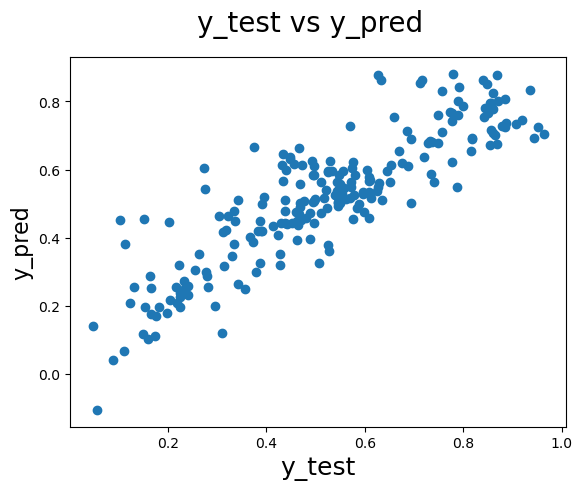

In [125]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=16)

##### it is evident moel is doing well on the test set as well

##### r2_score for 6 variable

In [126]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7518412352015953

#### checking the correlation between the final predictor variables

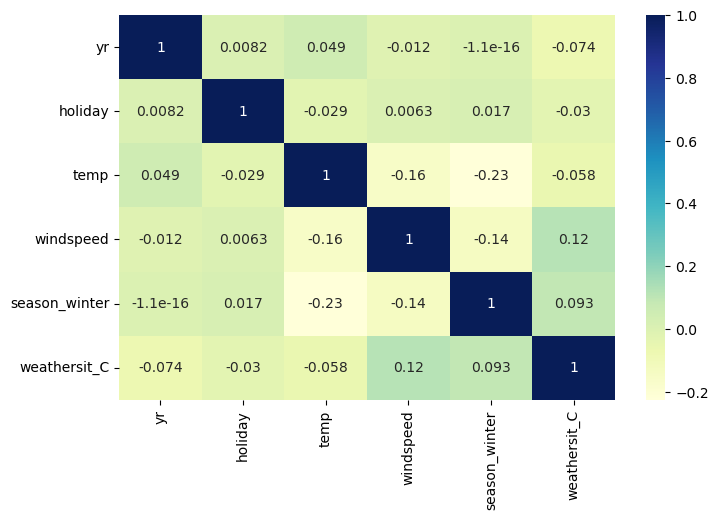

In [128]:
plt.figure(figsize=(8,5))
sns.heatmap(df[col2].corr(),cmap="YlGnBu",annot=True)
plt.show()

#### This is the simplest model that we could build. The final predictors seem to have fairly low correlations.

#### Thus, the final model consists of the 6 variables mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.